In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

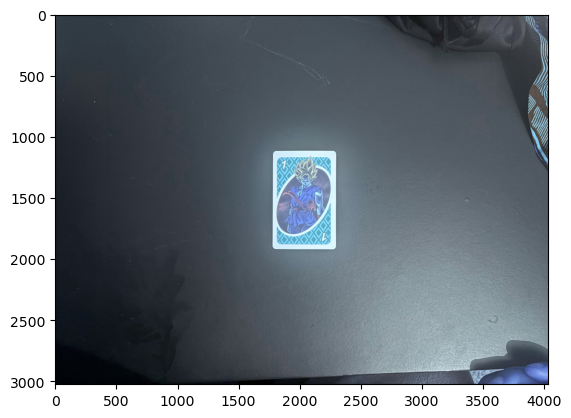

In [189]:
img = cv2.imread("unoyellowgokoucard.jpg")
plt.imshow(img)
plt_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

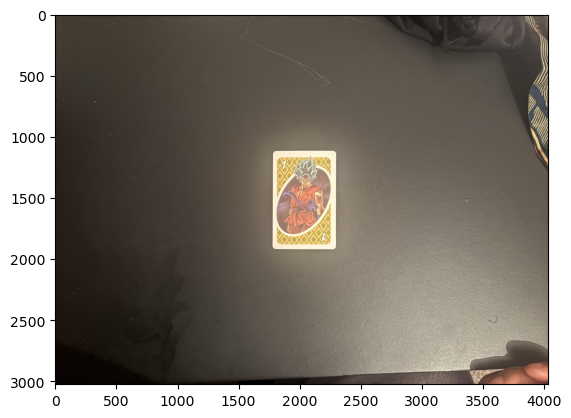

In [3]:
plt.imshow(plt_image)

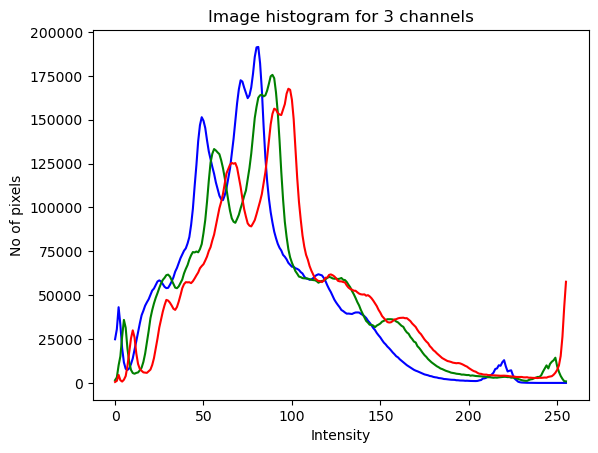

In [68]:
hist_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_green,color='green')
hist_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

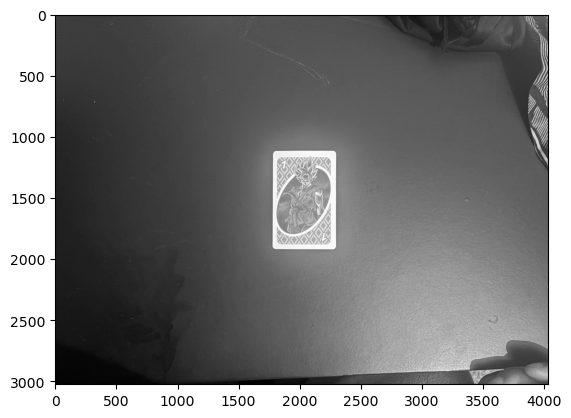

In [190]:
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [227]:
gray_image

array([[68, 63, 56, ..., 91, 89, 91],
       [68, 63, 56, ..., 93, 92, 93],
       [68, 64, 58, ..., 97, 96, 96],
       ...,
       [ 4,  4,  4, ..., 65, 64, 65],
       [ 5,  5,  5, ..., 64, 64, 67],
       [ 3,  3,  3, ..., 63, 65, 69]], dtype=uint8)

In [228]:
gray_image.shape

(3024, 4032)

In [13]:
while True:
    cv2.imshow("card_image",gray_image)

    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

<function destroyAllWindows>

: 

Converted to grayscale -> Converted to Binary by a simple threshold

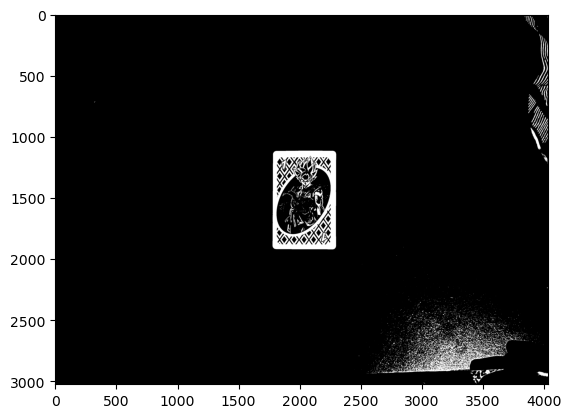

In [191]:
output_binary_image = np.zeros_like(gray_image)
cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,output_binary_image)
plt.imshow(output_binary_image,cmap='gray')

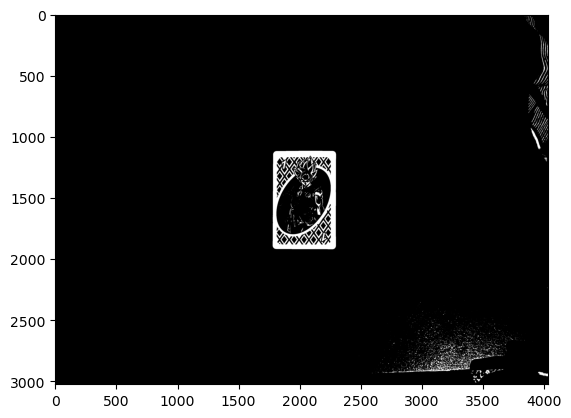

In [192]:
dilated_image = np.zeros_like(output_binary_image)
kernel = np.ones((3,3))
cv2.erode(output_binary_image,kernel,dilated_image)
plt.imshow(dilated_image,cmap='gray')

In [193]:
contours,hierarchy = cv2.findContours(dilated_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [117]:
contours

(array([[[2947, 3023]]], dtype=int32),
 array([[[3124, 3021]],
 
        [[3125, 3021]]], dtype=int32),
 array([[[3105, 3021]],
 
        [[3105, 3023]],
 
        [[3106, 3023]],
 
        [[3105, 3022]]], dtype=int32),
 array([[[3014, 3021]],
 
        [[3014, 3023]]], dtype=int32),
 array([[[2981, 3021]],
 
        [[2981, 3023]]], dtype=int32),
 array([[[3146, 3019]]], dtype=int32),
 array([[[3156, 3018]],
 
        [[3156, 3020]],
 
        [[3155, 3021]],
 
        [[3155, 3023]],
 
        [[3156, 3023]]], dtype=int32),
 array([[[3021, 3018]],
 
        [[3021, 3019]],
 
        [[3024, 3022]],
 
        [[3024, 3023]],
 
        [[3025, 3023]],
 
        [[3025, 3021]],
 
        [[3023, 3019]],
 
        [[3023, 3018]]], dtype=int32),
 array([[[2992, 3018]],
 
        [[2990, 3020]],
 
        [[2989, 3020]],
 
        [[2990, 3021]],
 
        [[2990, 3023]],
 
        [[2993, 3023]],
 
        [[2993, 3022]],
 
        [[2992, 3021]]], dtype=int32),
 array([[[3114, 3017]],
 

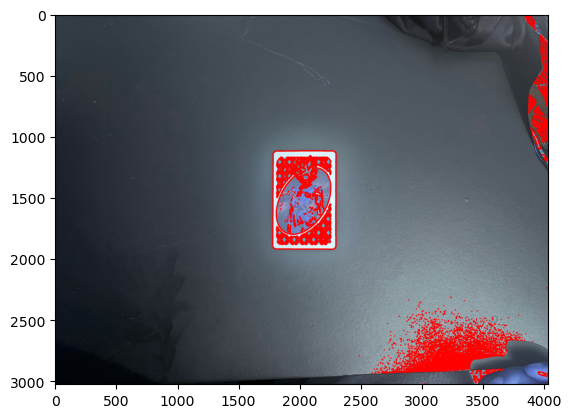

In [184]:
img_copy = np.copy(img)
cv2.drawContours(img_copy,contours,-1,(255,0,0),10)
plt.imshow(img_copy)

In [119]:
cnt_area = []

# loop through contours
for contour in contours:
    cnt_area.append(cv2.contourArea(contour))

list.sort(cnt_area,reverse=True)
cnt_area

[965304.0,
 412922.5,
 69536.0,
 11569.5,
 10232.5,
 7436.5,
 5469.5,
 4847.5,
 2642.0,
 2593.0,
 2485.0,
 2467.0,
 2431.5,
 2412.0,
 1988.0,
 1983.0,
 1903.0,
 1669.5,
 1493.0,
 1358.5,
 1309.0,
 1196.0,
 1157.0,
 1134.0,
 1124.5,
 1115.0,
 1069.0,
 976.0,
 904.5,
 823.5,
 815.0,
 753.5,
 745.5,
 736.5,
 728.0,
 716.0,
 708.0,
 707.5,
 706.5,
 704.5,
 691.0,
 687.5,
 676.0,
 662.0,
 615.0,
 611.0,
 610.5,
 608.5,
 599.5,
 598.5,
 586.5,
 576.5,
 576.0,
 548.0,
 538.0,
 534.0,
 525.0,
 508.5,
 495.5,
 492.0,
 485.5,
 483.5,
 481.5,
 480.0,
 469.0,
 459.0,
 449.5,
 448.0,
 434.5,
 424.5,
 421.5,
 420.5,
 414.0,
 410.5,
 394.0,
 393.5,
 386.5,
 382.0,
 378.0,
 378.0,
 375.5,
 374.5,
 370.5,
 370.5,
 369.5,
 364.5,
 361.0,
 361.0,
 341.5,
 336.5,
 329.0,
 319.5,
 317.5,
 316.5,
 316.0,
 307.5,
 306.5,
 294.5,
 294.0,
 291.5,
 290.0,
 288.5,
 287.0,
 287.0,
 286.5,
 281.5,
 281.5,
 279.5,
 277.0,
 274.5,
 272.0,
 271.5,
 270.0,
 267.0,
 262.0,
 260.5,
 256.0,
 251.0,
 246.0,
 240.5,
 240.5

In [186]:
img2_copy = np.copy(img)
area_threshold = 10

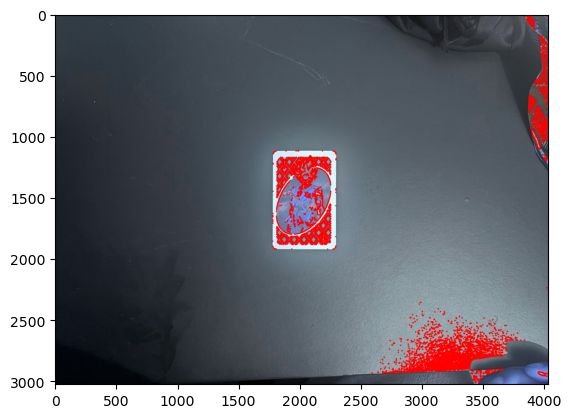

In [45]:
img2_copy = np.copy(img)
area_threshold = 0

for contour in contours:
    #print(cv2.contourArea(contour))
    if cv2.contourArea(contour) > area_threshold:
        cv2.drawContours(img2_copy,contour,-1,(255,0,0),10)

plt.imshow(img2_copy)

1780 1118 519 805


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

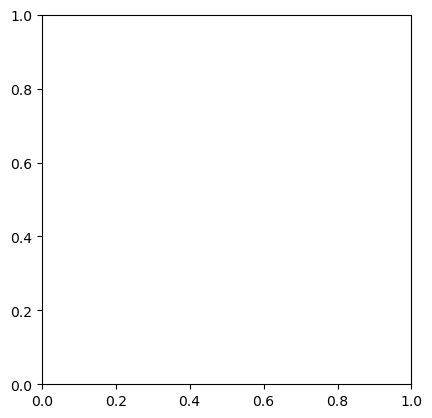

In [194]:
img2_copy = np.copy(img)
img2_copy = draw_bounding_box(contours,img)
plt.imshow(img2_copy)

Converted to binary by using an adaptive threshold

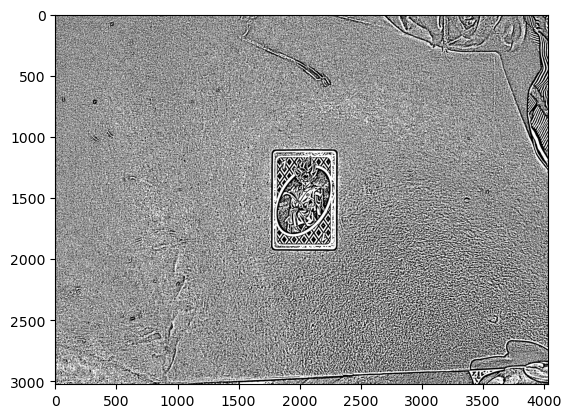

In [71]:
output_binary_image_2 = np.zeros_like(gray_image)
cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,27,0.05,output_binary_image_2)
plt.imshow(output_binary_image_2,cmap='gray')

Or try some k means clustering

In [72]:
img.dtype

dtype('uint8')

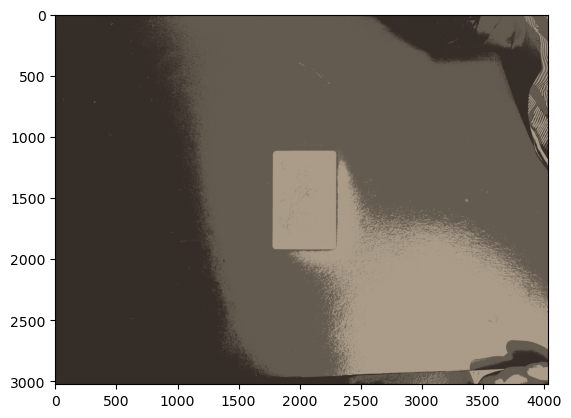

In [78]:
samples = img.reshape((-1,3))
samples = np.float32(samples)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(samples,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
res2_plt = cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)
plt.imshow(res2_plt)

Trying some edge detection now to improve results e.g. Canny

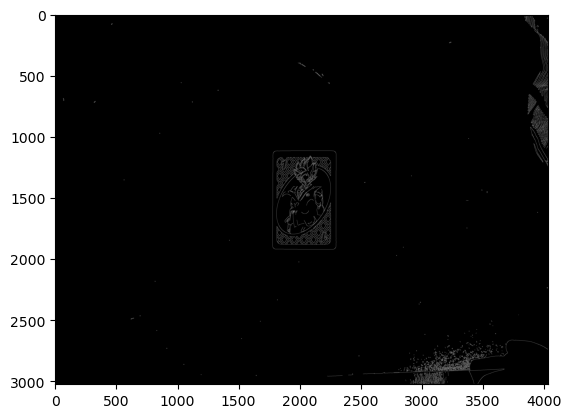

In [108]:
binary_edges = np.ones_like(img)
binary_edge_image = cv2.Canny(gray_image,120,255)
plt.imshow(binary_edge_image,cmap='gray')

Trying binary detection with a downscaled version of the image

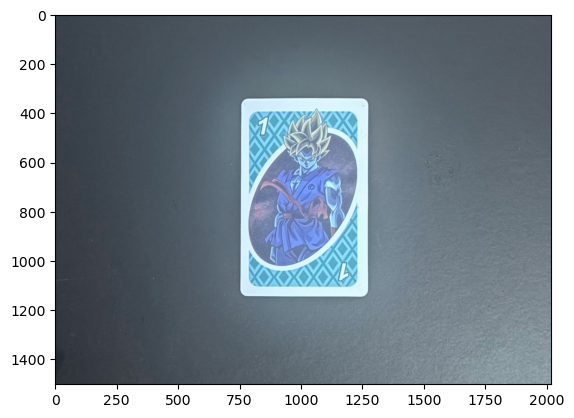

In [195]:
new_img = cv2.imread('unoyellowgokoucard_d2.jpg')
plt.imshow(new_img)

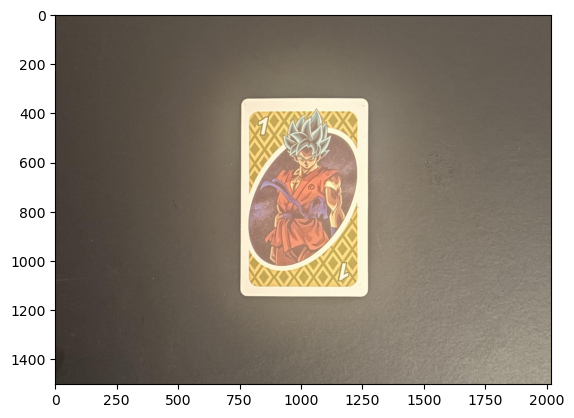

In [196]:
plt_new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imshow(plt_new_img)

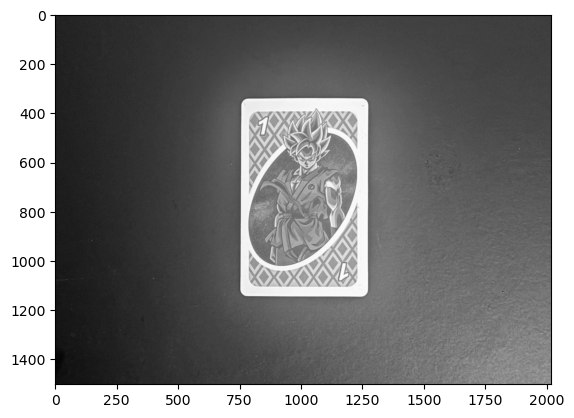

In [197]:
new_gray_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
plt.imshow(new_gray_img, cmap='gray')

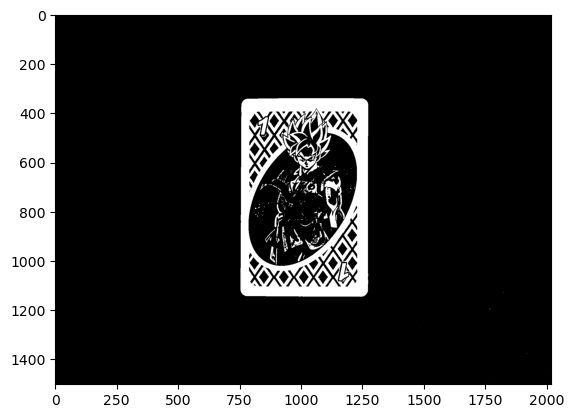

In [198]:
new_output_binary_image = np.zeros_like(new_gray_img)
cv2.threshold(new_gray_img,180,255,cv2.THRESH_BINARY,new_output_binary_image)
plt.imshow(new_output_binary_image, cmap='gray')

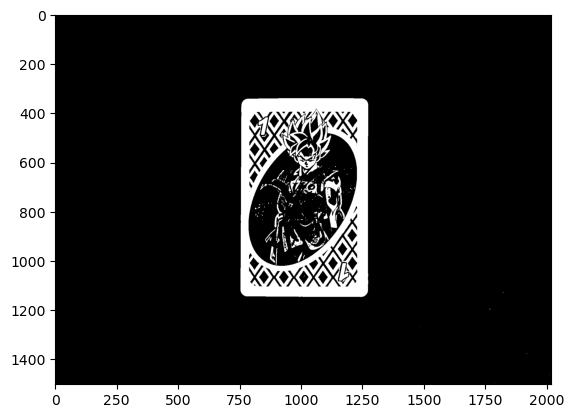

In [199]:
proc_image = np.zeros_like(new_output_binary_image)
cv2.dilate(new_output_binary_image,(81,81),proc_image)
plt.imshow(proc_image,cmap='gray')

In [200]:
contours,hierarchy = cv2.findContours(proc_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

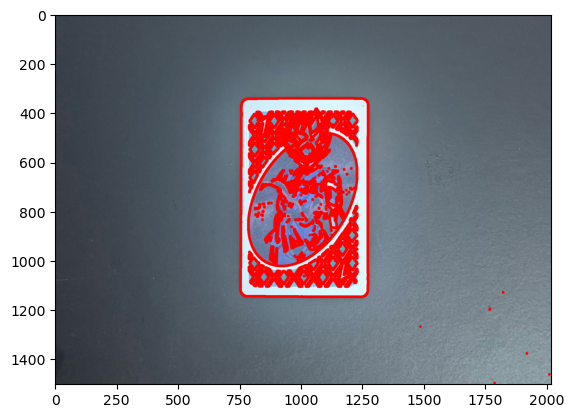

In [9]:
new_img_copy = np.copy(new_img)
cv2.drawContours(new_img_copy,contours,-1,(255,0,0),10)
plt.imshow(new_img_copy)

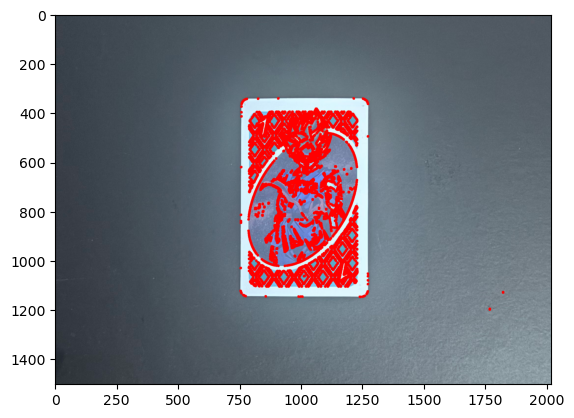

In [10]:
new_img2_copy = np.copy(new_img)
area_threshold = 1

for contour in contours:
    #print(cv2.contourArea(contour))
    if cv2.contourArea(contour) > area_threshold:
        cv2.drawContours(new_img2_copy,contour,-1,(255,0,0),10)

plt.imshow(new_img2_copy)

In [3]:
def find_contour_area(contours):
    cnt_area = []

    for i in range(0,len(contours),1):
        cnt_area.append(cv2.contourArea(contours[i]))

    list.sort(cnt_area,reverse=True)
    return cnt_area

In [4]:
def draw_bounding_box(contours,image, number_of_boxes=1):
    cnt_area = find_contour_area(contours)

    for i in range(0,len(contours),1):
        cnt = contours[i]

        if (cv2.contourArea(cnt) > cnt_area[number_of_boxes]):
            x,y,w,h = cv2.boundingRect(cnt)
            image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),10)
            print(x,y,w,h)

    return image,x,y,w,h

755 342 520 808


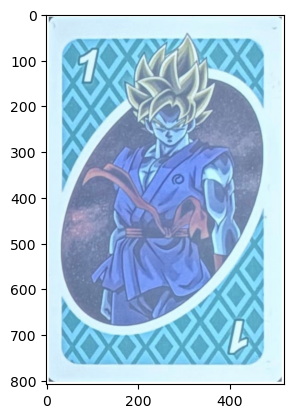

In [201]:
new_img2_copy = np.copy(new_img)
new_img2_copy,x,y,w,h = draw_bounding_box(contours,new_img2_copy)
plt.imshow(new_img2_copy[y:y+h,x:x+w,:])


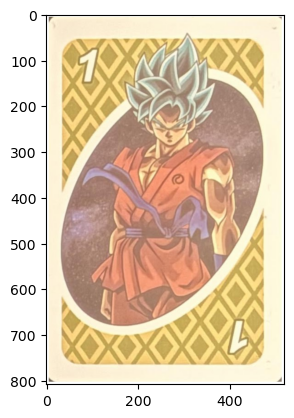

In [202]:
cropped = new_img2_copy[y:y+h,x:x+w,:]
plt_cropped = cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB)
plt.imshow(plt_cropped[:,:,0:3])

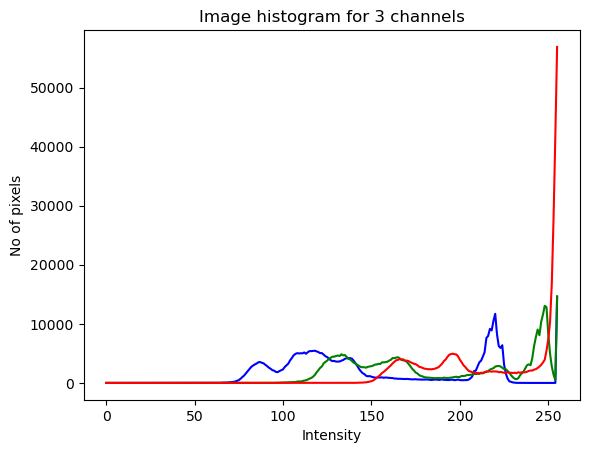

In [64]:
hist_blue = cv2.calcHist([cropped],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
hist_green = cv2.calcHist([cropped],[1],None,[256],[0,256])
plt.plot(hist_green,color='green')
hist_red = cv2.calcHist([cropped],[2],None,[256],[0,256])
plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

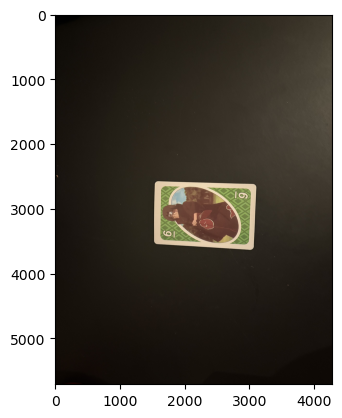

In [104]:
greencard = cv2.imread('greenitachicard.jpg')
plt_image = cv2.cvtColor(greencard,cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

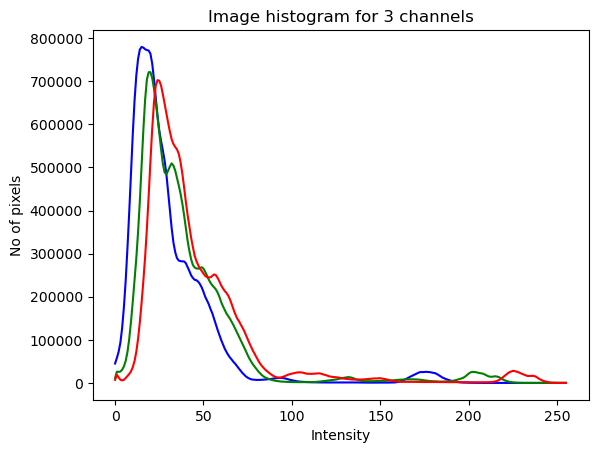

In [67]:
hist_blue = cv2.calcHist([greencard],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
hist_green = cv2.calcHist([greencard],[1],None,[256],[0,256])
plt.plot(hist_green,color='green')
hist_red = cv2.calcHist([greencard],[2],None,[256],[0,256])
plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

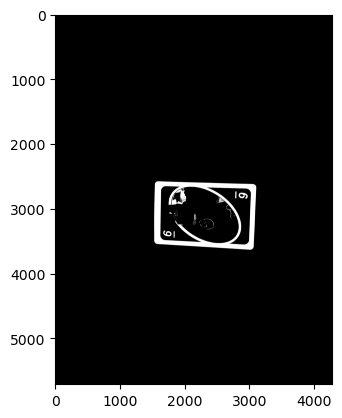

In [105]:
gray_image = cv2.cvtColor(greencard,cv2.COLOR_BGR2GRAY)
binary_image = np.ones_like(gray_image)
cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,binary_image)
plt.imshow(binary_image,cmap='gray')

In [5]:
def get_contours(image):
    contours,_ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [106]:
contours = get_contours(binary_image)
img_copy = img.copy()

img_copy,x,y,h,w = draw_bounding_box(contours,greencard)

1528 2582 1574 1057


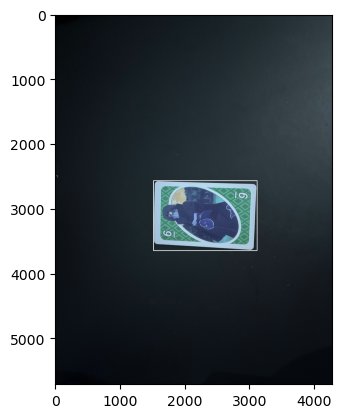

In [82]:
plt.imshow(img_copy)

In [6]:
# To write a function that takes in an image and outputs the cropped region of interest
def crop_to_image(image,x,y,w,h):
    cropped_image = image[y:y+h,x:x+w,:]
    return cropped_image

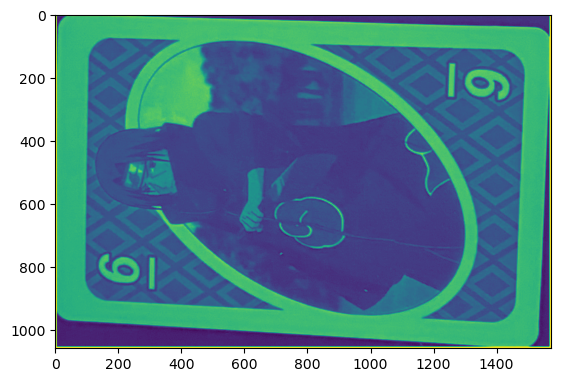

In [107]:
cropped_image = crop_to_image(greencard,x,y,w,h)
plt.imshow(cropped_image[:,:,0])

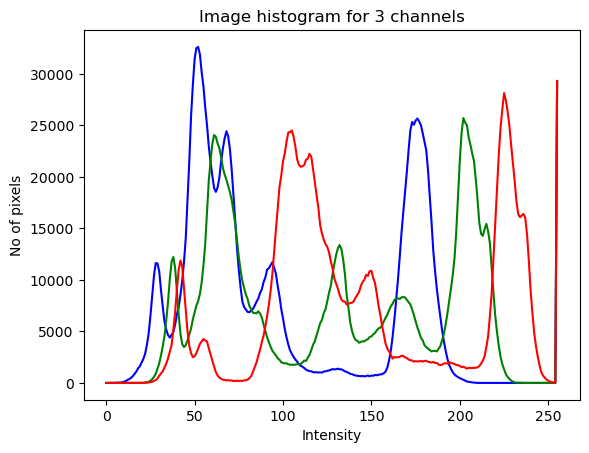

In [90]:
hist_blue = cv2.calcHist([cropped_image],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
hist_green = cv2.calcHist([cropped_image],[1],None,[256],[0,256])
plt.plot(hist_green,color='green')
hist_red = cv2.calcHist([cropped_image],[2],None,[256],[0,256])
plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

913 2151 1628 1089


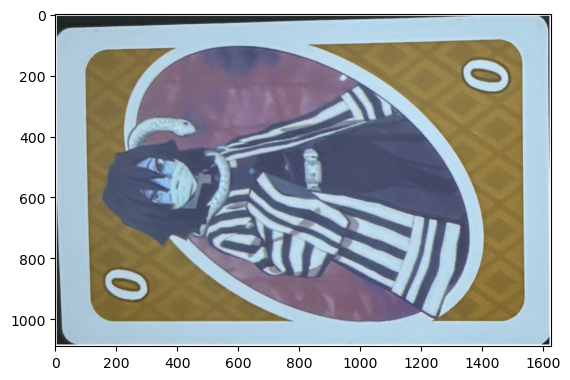

In [110]:
# Read in an image
image = cv2.imread("bluedemonslayercard.jpg")
# Convert to grayscale
gray_image = np.ones_like(image)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
# Convert to binary
binary_image = np.ones_like(gray_image)
cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,binary_image)
# Find contours
contours = get_contours(binary_image)
image_copy = np.copy(image)
image_copy,x,y,w,h = draw_bounding_box(contours,image)
cropped_image = crop_to_image(image_copy,x,y,w,h)
plt.imshow(cropped_image)

In [7]:
def locate_card(image):
    gray_image = np.ones_like(image)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Convert to binary
    binary_image = np.ones_like(gray_image)
    cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,binary_image)
    # Find contours
    contours = get_contours(binary_image)
    image_copy = np.copy(image)
    image_copy,x,y,w,h = draw_bounding_box(contours,image)
    cropped_image = crop_to_image(image_copy,x,y,w,h)
    
    return cropped_image

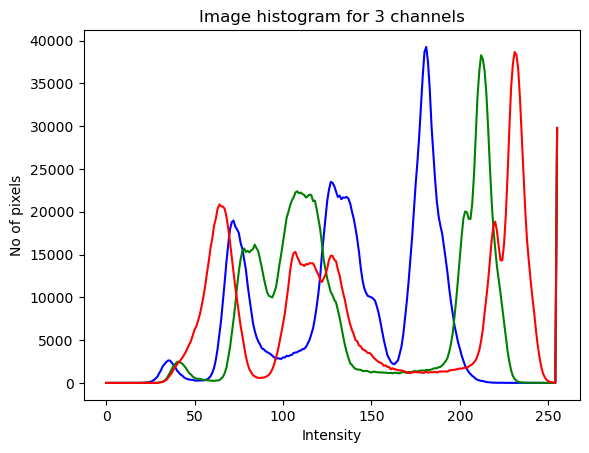

In [111]:
hist_blue = cv2.calcHist([cropped_image],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
hist_green = cv2.calcHist([cropped_image],[1],None,[256],[0,256])
plt.plot(hist_green,color='green')
hist_red = cv2.calcHist([cropped_image],[2],None,[256],[0,256])
plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

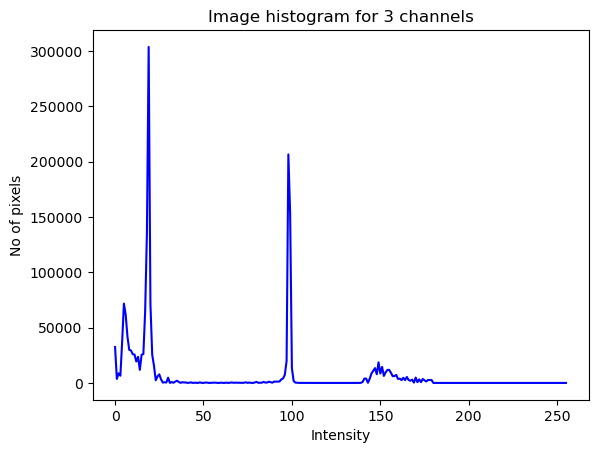

In [113]:
hls_image = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2HLS)
hist_blue = cv2.calcHist([hls_image],[0],None,[256],[0,256])
plt.plot(hist_blue,color='blue')
# hist_green = cv2.calcHist([hls_image],[1],None,[256],[0,256])
# plt.plot(hist_green,color='green')
# hist_red = cv2.calcHist([hls_image],[2],None,[256],[0,256])
# plt.plot(hist_red,color='red')
plt.title('Image histogram for 3 channels')
plt.xlabel('Intensity'); plt.ylabel('No of pixels')
plt.show()

In [127]:
lower_blue = np.array([90,0,0])
upper_blue = np.array([100,255,255])

lower_green = np.array([25,0,0])
upper_green = np.array([45,255,255])

lower_yellow = np.array([15,0,0])
upper_yellow = np.array([30,255,255])

lower_red = np.array([0,0,0])
upper_red = np.array([15,255,255])

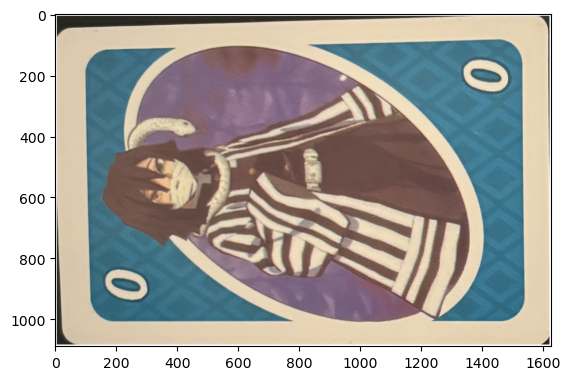

In [124]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

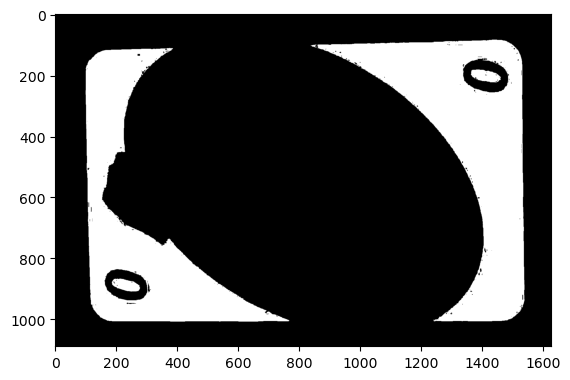

In [153]:
lower_blue = np.array([90,0,0])
upper_blue = np.array([100,255,255])

blue_mask = cv2.inRange(hls_image,lower_blue,upper_blue)
plt.imshow(blue_mask,cmap='gray')

In [172]:
(blue_mask ==255).sum()

412683

In [173]:
(blue_mask == 0).sum()

1360209

755 342 520 807


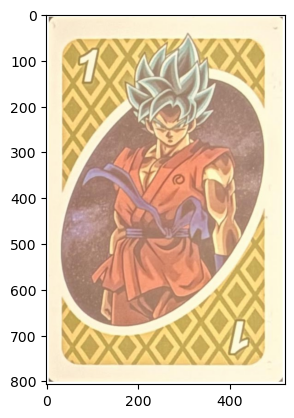

In [325]:
# Read in an image
image = cv2.imread("unoyellowgokoucard_d2.jpg")
cropped_image = locate_card(image)
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

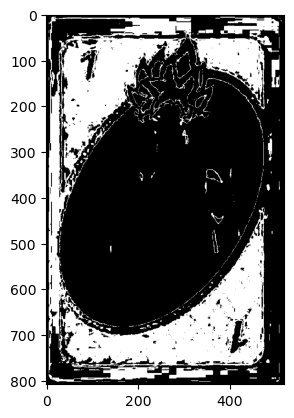

In [343]:
# Using goku to get yellow mask; I used this to get the right ranges
hls_image = cv2.cvtColor(cropped,cv2.COLOR_BGR2HLS)
lower_yellow = np.array([21,0,0])
upper_yellow = np.array([23,255,255])
yellow_mask = cv2.inRange(hls_image,lower_yellow,upper_yellow)
plt.imshow(yellow_mask,cmap='gray')

1528 2582 1574 1057


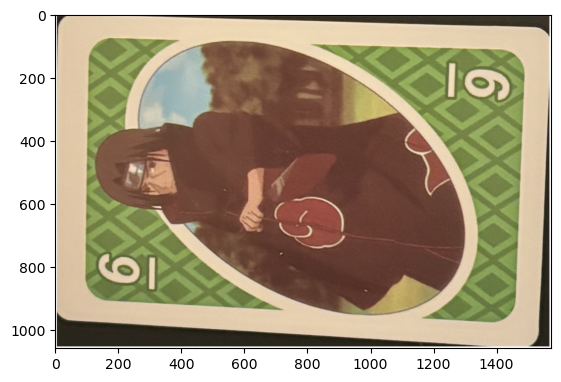

In [314]:
# Using itachi to get green mask ranges
# Read in an image
image = cv2.imread("greenitachicard.jpg")
cropped_image = locate_card(image)
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

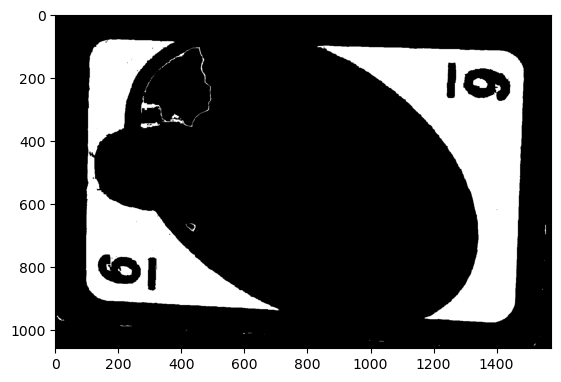

In [324]:
hls_image = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2HLS)
lower_green = np.array([35,0,0])
upper_green = np.array([45,255,255])
green_mask = cv2.inRange(hls_image,lower_green,upper_green)
plt.imshow(green_mask,cmap='gray')

1487 2213 1686 1090


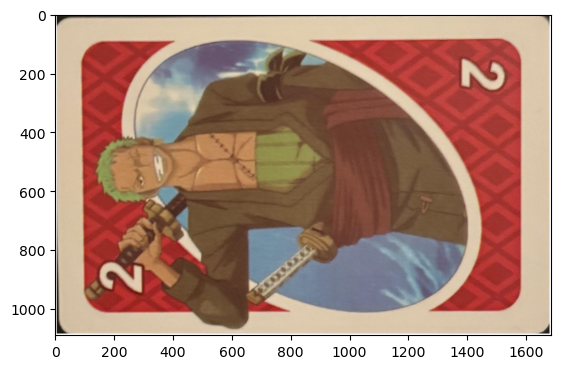

In [391]:
# Using zoro to get red mask ranges
# Read in an image
image = cv2.imread("redzorocard.jpg")
cropped_image = locate_card(image)
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

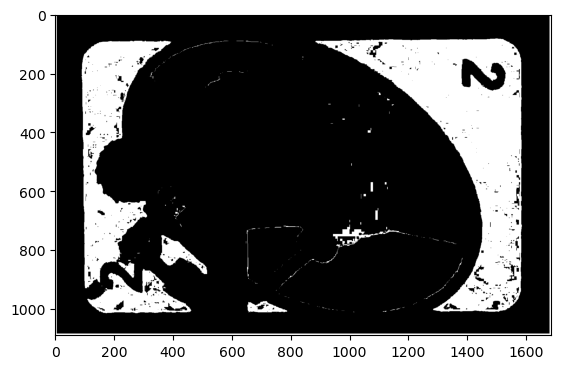

In [398]:
hls_image = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2HLS)
lower_red = np.array([0,0,0])
upper_red = np.array([5,255,255])
red_mask = cv2.inRange(hls_image,lower_red,upper_red)
plt.imshow(red_mask,cmap='gray')

In [11]:
def generate_masks(input_image):
    hls_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2HLS)
    
    lower_blue = np.array([90,0,0])
    upper_blue = np.array([100,255,255])

    lower_green = np.array([35,0,0])
    upper_green = np.array([45,255,255])

    lower_yellow = np.array([20,0,0])
    upper_yellow = np.array([23,255,255])

    lower_red = np.array([0,0,0])
    upper_red = np.array([5,255,255])

    red_mask = cv2.inRange(hls_image,lower_red,upper_red)
    green_mask = cv2.inRange(hls_image,lower_green,upper_green)
    yellow_mask = cv2.inRange(hls_image,lower_yellow,upper_yellow)
    blue_mask = cv2.inRange(hls_image,lower_blue,upper_blue)

    return red_mask, green_mask, blue_mask, yellow_mask

913 2151 1628 1089


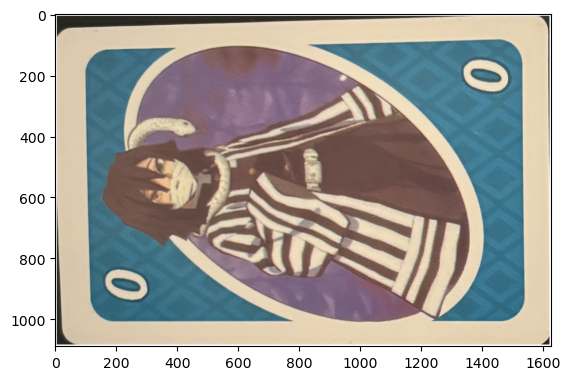

In [345]:
# Now generating masks for each 
# Read in an image
image = cv2.imread("bluedemonslayercard.jpg")
cropped_image = locate_card(image)
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [346]:
red_mask, green_mask, blue_mask, yellow_mask = generate_masks(cropped_image)

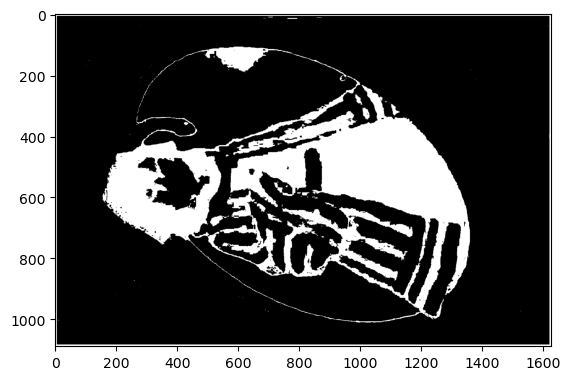

In [348]:
plt.imshow(red_mask,cmap='gray')

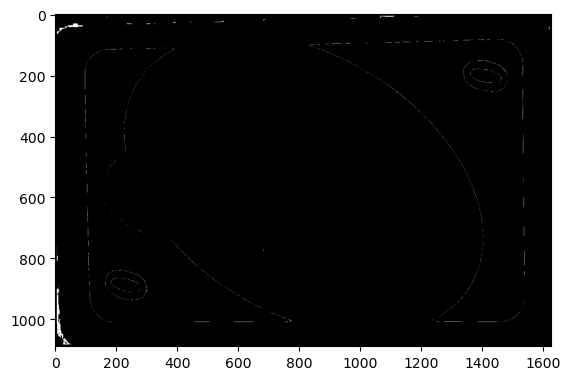

In [349]:
plt.imshow(green_mask,cmap='gray')

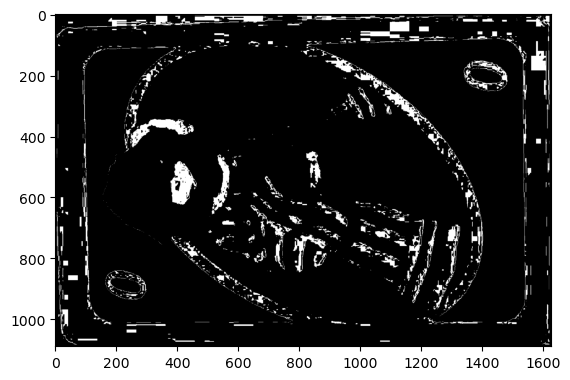

In [350]:
plt.imshow(yellow_mask,cmap='gray')

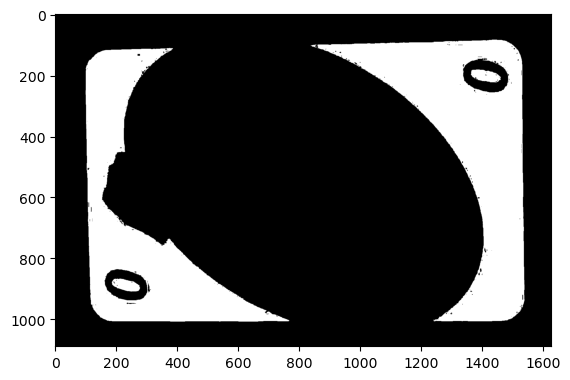

In [351]:
plt.imshow(blue_mask,cmap='gray')

In [352]:
print((red_mask == 255).sum())
print((green_mask == 255).sum())
print((yellow_mask == 255).sum())
print((blue_mask == 255).sum())

349006
5291
114551
412683


In [ ]:
red_mask_probs = (red_mask == 255).sum()/red_mask.size
green_mask_probs = (green_mask == 255).sum()/green_mask.size
yellow_mask_probs = (yellow_mask == 255).sum()/yellow_mask.size
blue_mask_probs = (blue_mask == 255).sum()/blue_mask.size
print("Red Card? - " + str(red_mask_probs*100) +"%")
print("Green Card? - " + str(green_mask_probs*100) +"%")
print("Yellow Card? - " + str(yellow_mask_probs*100) +"%")
print("Blue Card? - " + str(blue_mask_probs*100) +"%")

Red Card? - 19.685688693953157%
Green Card? - 0.29843893480257117%
Yellow Card? - 6.461250882738486%
Blue Card? - 23.27739083937431%
0.4972276935086852


In [44]:
def determineCardColour(red_mask, green_mask, yellow_mask, blue_mask):
    red_mask_probs = (red_mask == 255).sum()/red_mask.size
    green_mask_probs = (green_mask == 255).sum()/green_mask.size
    yellow_mask_probs = (yellow_mask == 255).sum()/yellow_mask.size
    blue_mask_probs = (blue_mask == 255).sum()/blue_mask.size

    mask_probs = np.array([red_mask_probs,green_mask_probs,yellow_mask_probs,blue_mask_probs])

    max_mask_prob_loc = np.argmax(mask_probs)
    if (max_mask_prob_loc == 0):
        return "Red", mask_probs[0]
    elif (max_mask_prob_loc == 1):
        return "Green", mask_probs[1]
    elif (max_mask_prob_loc == 2):
        return "Yellow", mask_probs[2]
    elif (max_mask_prob_loc == 3):
        return "Blue", mask_probs[3]
    else:
        return "Error occurred", 0

In [370]:
colour, colourProb = determineCardColour(red_mask,green_mask,yellow_mask,blue_mask)
print("The colour of this card is " + colour + " with probability of " + str(colourProb*100) + "%")

The colour of this card is blue with probability of 23.27739083937431%


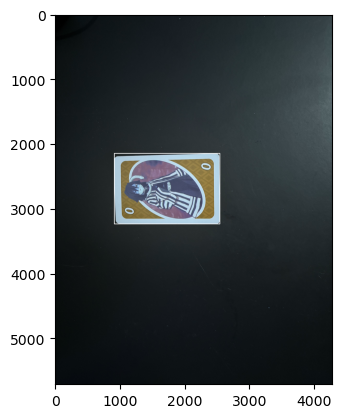

In [371]:
plt.imshow(image)

In [51]:
def locate_card_improved(image):
    gray_image = np.ones_like(image)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Convert to binary
    binary_image = np.ones_like(gray_image)
    cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,binary_image)
    # Find contours
    contours = get_contours(binary_image)
    image_copy = np.copy(image)
    image_copy,x,y,w,h = draw_bounding_box(contours,image)
    cropped_image = crop_to_image(image_copy,x,y,w,h)
    red_mask, green_mask, blue_mask, yellow_mask = generate_masks(cropped_image)
    colour, colourProb = determineCardColour(red_mask,green_mask,yellow_mask,blue_mask)

    text_to_display = colour + " - " + str(round(colourProb,4))
    text_x = x
    text_y = y - 15
    font = cv2.FONT_HERSHEY_SIMPLEX
    (text_width, text_height), baseline = cv2.getTextSize(text_to_display,font,4,10)
    cv2.rectangle(image_copy,(text_x, text_y - text_height - baseline),(text_x + text_width, text_y + baseline),(255,255,255),cv2.FILLED)
    cv2.putText(image_copy,text_to_display,(text_x,text_y),font,4,(0,0,0),10)
    
    return image_copy
    

In [52]:
# Test Example
###
# Read in an image
image = cv2.imread("bluedemonslayercard.jpg")
processed_image = locate_card_improved(image)

913 2151 1628 1089


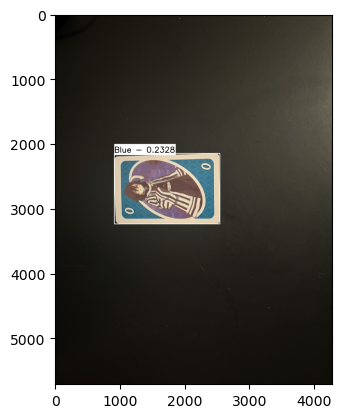

In [53]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

1528 2582 1574 1057


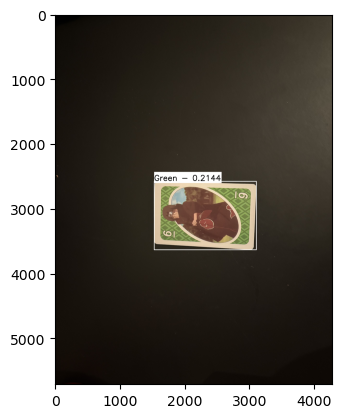

In [47]:
# Test Example
###
# Read in an image
image = cv2.imread("greenitachicard.jpg")
processed_image = locate_card_improved(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

1487 2213 1686 1090


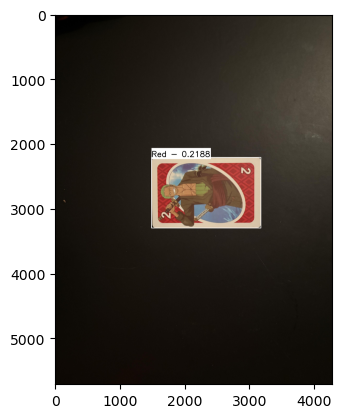

In [48]:
# Test Example
###
# Read in an image
image = cv2.imread("redzorocard.jpg")
processed_image = locate_card_improved(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

755 342 520 807


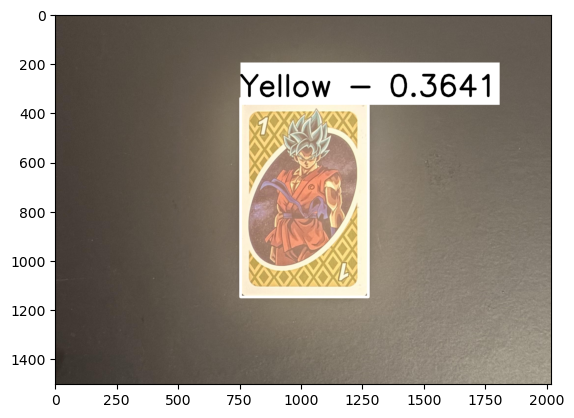

In [49]:
# Test Example
###
# Read in an image
image = cv2.imread("unoyellowgokoucard_d2.jpg")
processed_image = locate_card_improved(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

1779 1117 521 807


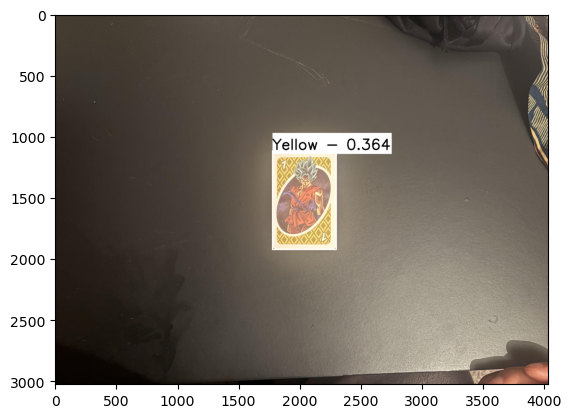

In [50]:
# Test Example
###
# Read in an image
image = cv2.imread("unoyellowgokoucard.jpg")
processed_image = locate_card_improved(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

Image Segmentation and Colour Detection Complete - Now to write functions for a main file to run code

In [3]:
def read_image(img_name: str):
    img = cv2.imread(img_name)

    if img.size != 0:
        return img
    else:
        print("An error has occurred when reading in the image")
        return None

def get_contours(image):
    contours,_ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

def find_contour_area(contours):
    cnt_area = []

    for i in range(0,len(contours),1):
        cnt_area.append(cv2.contourArea(contours[i]))

    list.sort(cnt_area,reverse=True)
    return cnt_area

def draw_bounding_box(contours,image, number_of_boxes=1):
    cnt_area = find_contour_area(contours)

    for i in range(0,len(contours),1):
        cnt = contours[i]

        if (cv2.contourArea(cnt) > cnt_area[number_of_boxes]):
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),10)
            #print(x,y,w,h)

    return x,y,w,h

def crop_to_image(image,x,y,w,h):
    cropped_image = image[y:y+h,x:x+w,:]
    return cropped_image

def generate_masks(input_image):
    hls_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2HLS)
    
    lower_blue = np.array([90,0,0])
    upper_blue = np.array([100,255,255])

    lower_green = np.array([35,0,0])
    upper_green = np.array([45,255,255])

    lower_yellow = np.array([20,0,0])
    upper_yellow = np.array([23,255,255])

    lower_red = np.array([0,0,0])
    upper_red = np.array([5,255,255])

    red_mask = cv2.inRange(hls_image,lower_red,upper_red)
    green_mask = cv2.inRange(hls_image,lower_green,upper_green)
    yellow_mask = cv2.inRange(hls_image,lower_yellow,upper_yellow)
    blue_mask = cv2.inRange(hls_image,lower_blue,upper_blue)

    return red_mask, green_mask, blue_mask, yellow_mask

def determineCardColour(red_mask, green_mask, yellow_mask, blue_mask):
    red_mask_probs = (red_mask == 255).sum()/red_mask.size
    green_mask_probs = (green_mask == 255).sum()/green_mask.size
    yellow_mask_probs = (yellow_mask == 255).sum()/yellow_mask.size
    blue_mask_probs = (blue_mask == 255).sum()/blue_mask.size

    mask_probs = np.array([red_mask_probs,green_mask_probs,yellow_mask_probs,blue_mask_probs])

    max_mask_prob_loc = np.argmax(mask_probs)
    if (max_mask_prob_loc == 0):
        return "Red", mask_probs[0]
    elif (max_mask_prob_loc == 1):
        return "Green", mask_probs[1]
    elif (max_mask_prob_loc == 2):
        return "Yellow", mask_probs[2]
    elif (max_mask_prob_loc == 3):
        return "Blue", mask_probs[3]
    else:
        return "Error occurred", 0
    

def locate_card_in_image(colour_image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(colour_image,cv2.COLOR_BGR2GRAY)
    # Convert to binary
    binary_image = np.ones_like(gray_image)
    cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY,binary_image)
    # Find contours
    contours = get_contours(binary_image)

    # Draw bounding box from contours
    image_copy = np.copy(colour_image)
    x,y,w,h = draw_bounding_box(contours,image_copy)

    # Extract detected region from image
    cropped_image = crop_to_image(image_copy,x,y,w,h)

    # Generates binary masks for the detection of the 4 main card colours
    red_mask, green_mask, blue_mask, yellow_mask = generate_masks(cropped_image)

    # Determine the card colour from the largest amount of colour pixels in masks
    colour, colourProb = determineCardColour(red_mask,green_mask,yellow_mask,blue_mask)

    # Draw outpput card class and associated class probability
    text_to_display = colour + " - " + str(round(colourProb,4))
    text_x = x
    text_y = y - 15
    font = cv2.FONT_HERSHEY_SIMPLEX
    (text_width, text_height), baseline = cv2.getTextSize(text_to_display,font,4,10)
    cv2.rectangle(image_copy,(text_x, text_y - text_height - baseline),(text_x + text_width, text_y + baseline),(255,255,255),cv2.FILLED)
    cv2.putText(image_copy,text_to_display,(text_x,text_y),font,4,(0,0,0),10)
    
    return gray_image, binary_image, cropped_image, image_copy, red_mask, green_mask, yellow_mask, blue_mask

In [4]:
# Main.py

# read in image
# img_name = "Img/something.jpg"
img_name = "string"
# display colour, grayscale, binary, mask, output image

input_image = read_image("bluedemonslayercard.jpg")

gray_image = np.ones_like(input_image)
binary_image = np.ones_like(gray_image)
output_image = np.ones_like(input_image)


gray_image, binary_image, cropped_image, output_image,_,_,_,_ = locate_card_in_image(input_image)

913 2151 1628 1089


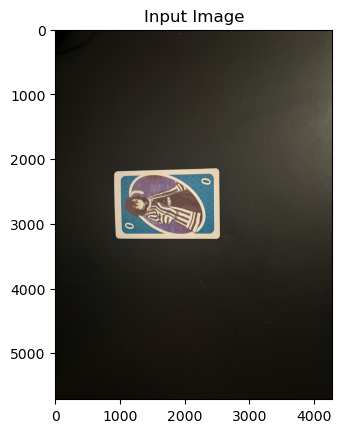

In [11]:
plt.title("Input Image")
plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))


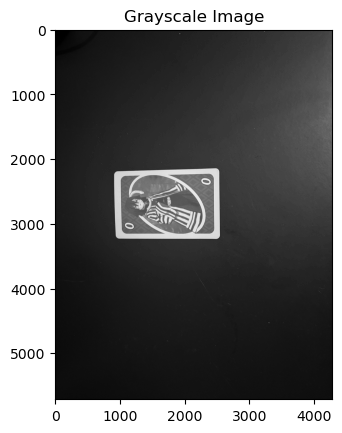

In [13]:
plt.title("Grayscale Image")
plt.imshow(gray_image,cmap='gray')

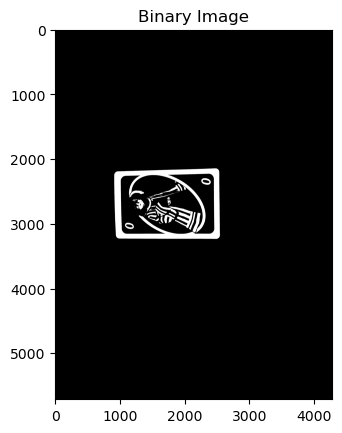

In [14]:
plt.title("Binary Image")
plt.imshow(binary_image,cmap="gray")

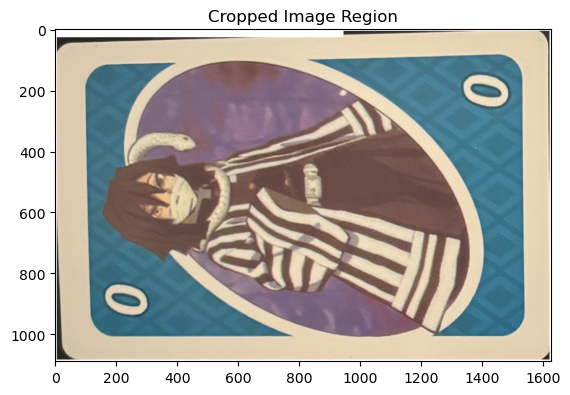

In [16]:
plt.title("Cropped Image Region")
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

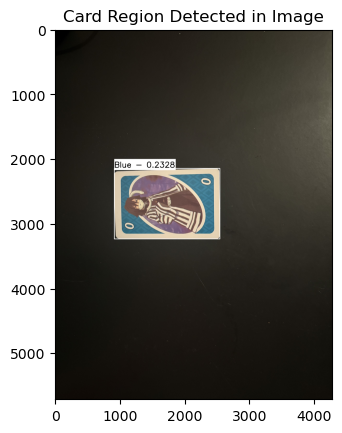

In [17]:
plt.title("Card Region Detected in Image")
plt.imshow(cv2.cvtColor(output_image,cv2.COLOR_BGR2RGB))